In [1]:
import pandas as pd

protein_id_list = []
protein_sequence_list = []
f = open("/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/ori_fasta/PA_nuORFdb_v1.0.fasta", 'r')
text = f.readlines()

for line in text:
    if ">" in line:
        protein_id_list.append(line.split(">")[1].split("\n")[0])
        protein_sequence_list.append("")
    else:
        protein_sequence_list[-1] += line.replace("\n", "")
        
from alphabase.protein import fasta

nuORF_protein_df = pd.DataFrame(
    {
        "protein_id": protein_id_list,
        "sequence": protein_sequence_list,
        "gene_org": "HUMAN"
    }
)
nuORF_protein_df

,protein_id,sequence,gene_org
0,ENST00000616016.4_1_1:861321-878072:+|GN=SAMD1...,MSKGILQVHPPICDCPGCRISSPVNRGRLADKRTVALPAARNLKKE...,HUMAN
1,ENST00000342066.7_2_1:861321-879530:+|GN=SAMD1...,MSKGILQVHPPICDCPGCRISSPVNRGRLADKRTVALPAARNLKKE...,HUMAN
2,ENST00000618181.4_2_1:861321-879530:+|GN=SAMD1...,MSKGILQVHPPICDCPGCRISSPVNRGRLADKRTVALPAARNLKKE...,HUMAN
3,ENST00000622503.4_2_1:861321-879530:+|GN=SAMD1...,MSKGILQVHPPICDCPGCRISSPVNRGRLADKRTVALPAARNLKKE...,HUMAN
4,ENST00000618779.4_2_1:861321-879530:+|GN=SAMD1...,MSKGILQVHPPICDCPGCRISSPVNRGRLADKRTVALPAARNLKKE...,HUMAN
...,...,...,...
323843,ENST00000490936.5_1_X:153582808-153583009:-|GN...,TPRAASRLGPRRGPWWVSMGWM,HUMAN
323844,ENST00000372382.8_1_X:106965231-106965261:-|GN...,IFHETKVTM,HUMAN
323845,ENST00000372382.8_1_X:106959151-106965182:-|GN...,KGREKISEKQGQIKPWHFSLLIPPASSEKGTMPPEPAWWP,HUMAN
323846,ENST00000445125.2_1_Y:10036391-10036418:-|GN=A...,LPRRVGTR,HUMAN


In [2]:
import pandas as pd

nuORF_summary_df = pd.read_excel("~/Desktop/hla/test_cjt/data/PXD034772/DIA-nuORF/dia_nuorf_result_compare.xlsx")

In [3]:
files = []
base_path = "/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-nuORF"
for i in range(nuORF_summary_df.shape[0]):
    tmp_id = nuORF_summary_df.loc[i, "sample_id"]
    tmp_id = tmp_id.replace("_", "-")
    tmp_file = f"{base_path}/{tmp_id}/report-1.tsv"
    files.append(tmp_file)
files

['/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-nuORF/C3N-02287-01/report-1.tsv',
 '/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-nuORF/C3N-02287-02/report-1.tsv',
 '/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-nuORF/C3N-02287-04/report-1.tsv',
 '/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-nuORF/C3N-02287-05/report-1.tsv',
 '/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-nuORF/C3N-02287-06/report-1.tsv',
 '/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-nuORF/C3N-02287-07/report-1.tsv',
 '/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-nuORF/C3N-02287-10/report-1.tsv',
 '/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-nuORF/C3N-02288-01/report-1.tsv',
 '/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-nuORF/C3N-02288-02/report-1.tsv',
 '/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-nuORF/C3N-02288-05/report-1.tsv',
 '/Users/chengjintao/Desktop/hla/test_cjt/data/PXD

In [4]:
nuORF_summary_df["new"] = [0] * nuORF_summary_df.shape[0]

for i in range(len(files)):
    nuORF_df = pd.read_table(files[i])
    tmp_precursor_df = pd.DataFrame(
        {
            'charge': nuORF_df["Precursor.Charge"],
            'sequence': nuORF_df["Stripped.Sequence"],
        }
    )
    output_precursor_df = fasta.annotate_precursor_df(tmp_precursor_df, nuORF_protein_df)
    output_precursor_df.drop_duplicates(subset="sequence", keep="first", inplace=True)
    nuORF_peptide_list = []
    for k in range(output_precursor_df.shape[0]):
        protein_id_list = output_precursor_df.iloc[k]["proteins"]
        if "Canonical" in protein_id_list:
            continue
        else:
            nuORF_peptide_list.append(output_precursor_df.iloc[k]["sequence"])    
    nuORF_summary_df.loc[i, "new"] = len(list(set(nuORF_peptide_list)))


100%|██████████| 323848/323848 [00:03<00:00, 101630.49it/s]


In [5]:
nuORF_summary_df.to_excel("~/Desktop/hla/test_cjt/data/PXD034772/DIA-nuORF/dia_nuorf_result_compare.xlsx", index=False)

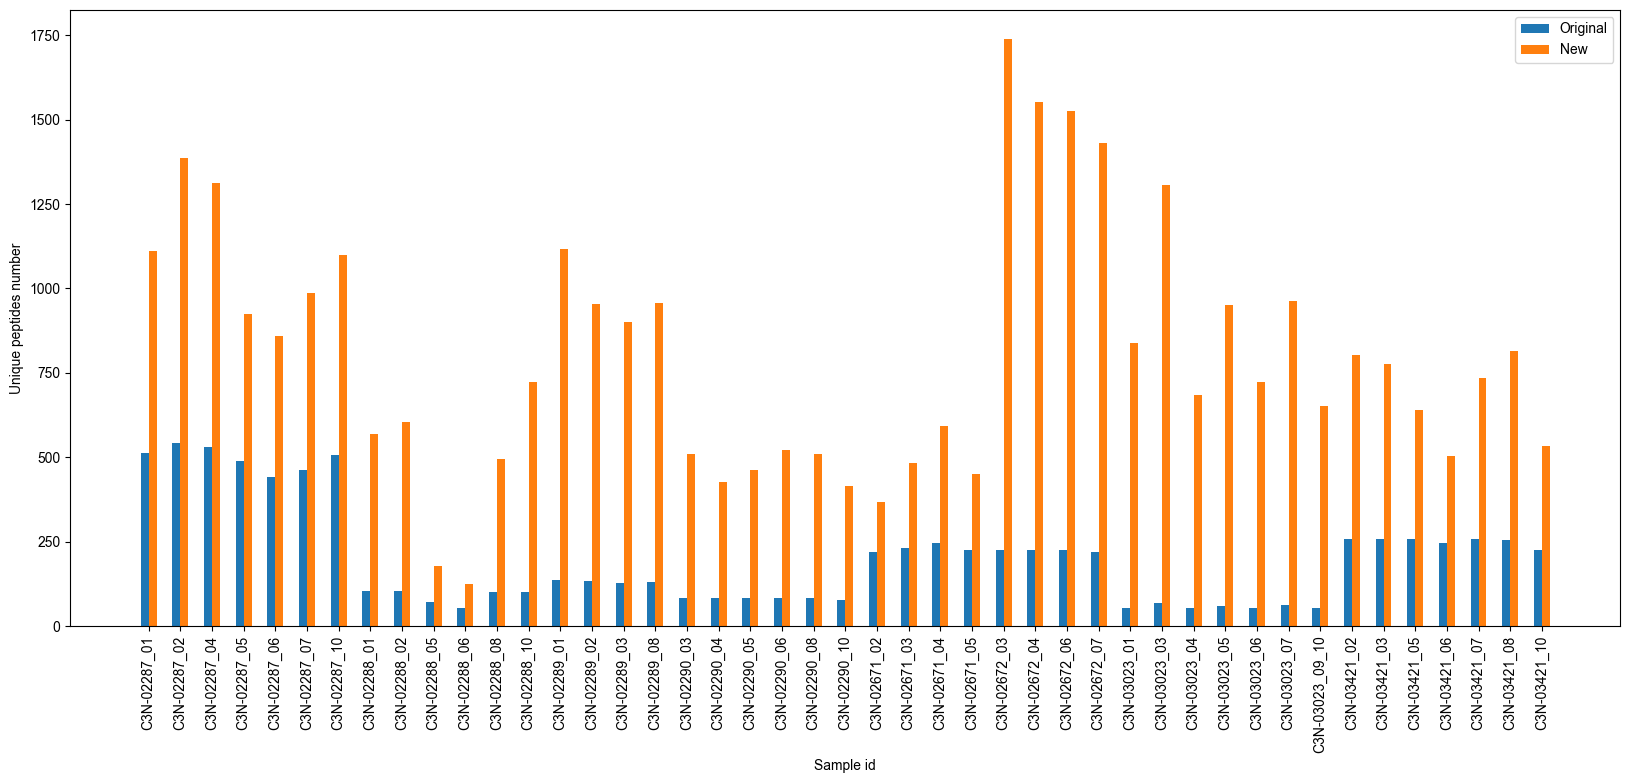

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(20, 8))
# 设置柱状图的位置和宽度
bar_width = 1
index = 4*np.arange(nuORF_summary_df.shape[0])

# 绘制柱状图
plt.bar(index, nuORF_summary_df["originial"], bar_width, label="Original")
plt.bar(index + bar_width, nuORF_summary_df["new"], bar_width, label="New")

# 添加标题和轴标签
plt.xlabel('Sample id')
plt.ylabel('Unique peptides number')

# 显示图例
plt.legend()

# 在X轴上设置类别标签
plt.xticks(index + bar_width / 2, nuORF_summary_df["sample_id"], rotation=90)

# 显示图表
# plt.tight_layout()
plt.savefig('/Users/chengjintao/Desktop/hla/test_cjt/figures/fig2_dia_nuORF.svg', format='svg', dpi=300, bbox_inches='tight')